<a href="https://colab.research.google.com/github/HimanshuSingh-all/Atomistic-Simulations/blob/main/Markov_Chain_Sentence_Maker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
string = """To Sherlock Holmes she is always the woman. I have seldom heard him
     mention her under any other name. In his eyes she eclipses and
     predominates the whole of her sex. It was not that he felt any
     emotion akin to love for Irene Adler. All emotions, and that one
     particularly, were abhorrent to his cold, precise but admirably
     balanced mind. He was, I take it, the most perfect reasoning and
     observing machine that the world has seen, but as a lover he would
     have placed himself in a false position. He never spoke of the softer
     passions, save with a gibe and a sneer. They were admirable things
     for the observer--excellent for drawing the veil from men's motives
     and actions. But for the trained reasoner to admit such intrusions
     into his own delicate and finely adjusted temperament was to
     introduce a distracting factor which might throw a doubt upon all his
     mental results. Grit in a sensitive instrument, or a crack in one of
     his own high-power lenses, would not be more disturbing than a strong
     emotion in a nature such as his. And yet there was but one woman to
     him, and that woman was the late Irene Adler, of dubious and
     questionable memory.
     I had seen little of Holmes lately. My marriage had drifted us away
     from each other. My own complete happiness, and the home-centred
     interests which rise up around the man who first finds himself master
     of his own establishment, were sufficient to absorb all my attention,
     while Holmes, who loathed every form of society with his whole
     Bohemian soul, remained in our lodgings in Baker Street, buried among
     his old books, and alternating from week to week between cocaine and
     ambition, the drowsiness of the drug, and the fierce energy of his
     own keen nature. He was still, as ever, deeply attracted by the study
     of crime, and occupied his immense faculties and extraordinary powers
     of observation in following out those clues, and clearing up those
     mysteries which had been abandoned as hopeless by the official
     police. From time to time I heard some vague account of his doings:
     of his summons to Odessa in the case of the Trepoff murder, of his
     clearing up of the singular tragedy of the Atkinson brothers at
     Trincomalee, and finally of the mission which he had accomplished so
     delicately and successfully for the reigning family of Holland.
     Beyond these signs of his activity, however, which I merely shared
     with all the readers of the daily press, I knew little of my former
     friend and companion.

     One night--it was on the twentieth of March, 1888--I was returning
     from a journey to a patient (for I had now returned to civil
     practice), when my way led me through Baker Street. As I passed the
     well-remembered door, which must always be associated in my mind with
     my wooing, and with the dark incidents of the Study in Scarlet, I was
     seized with a keen desire to see Holmes again, and to know how he was
     employing his extraordinary powers. His rooms were brilliantly lit,
     and, even as I looked up, I saw his tall, spare figure pass twice in
     a dark silhouette against the blind. He was pacing the room swiftly,
     eagerly, with his head sunk upon his chest and his hands clasped
     behind him. To me, who knew his every mood and habit, his attitude
     and manner told their own story. He was at work again. He had risen
     out of his drug-created dreams and was hot upon the scent of some new
     problem. I rang the bell and was shown up to the chamber which had
     formerly been in part my own.

     His manner was not effusive. It seldom was; but he was glad, I think,
     to see me. With hardly a word spoken, but with a kindly eye, he waved
     me to an armchair, threw across his case of cigars, and indicated a
     spirit case and a gasogene in the corner. Then he stood before the
     fire and looked me over in his singular introspective fashion."""

In [ ]:
wordIndex = dict()
wordList = list()
for i,word in enumerate(string.split()):
    if word not in wordIndex:
        wordList.append(word)
        wordIndex[word] = len(wordList) -1



In [ ]:
#Testing if the above code block is working like I intended to do
test_passed = True
for word in string.split():
    if word != wordList[wordIndex[word]]:
        test_passed = False

if test_passed:
    print(' test Passed ')
else:
    print(' Test Failed!!!')

 test Passed 


In [ ]:
N = len(wordList)
freq_table_np = np.zeros((N,N))
word_freqs = np.zeros(N)
for i, word in enumerate(string.split()[:-1]):
    cur_ind = wordIndex[word]
    next_ind = cur_ind + 1
    freq_table_np[cur_ind, next_ind] +=1
    word_freqs +=1

Text(0.5, 1.0, 'Word to nextword transititon counts')

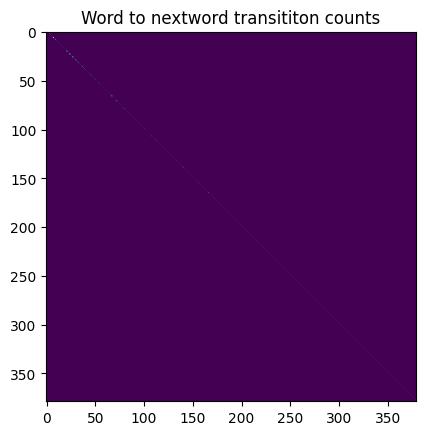

In [ ]:
plt.imshow(freq_table_np[:,:])
plt.title('Word to nextword transititon counts')

In [ ]:
#args = np.argsort(freq_table_np[:], axis = 1)
max = np.max(freq_table_np)
softmax_probabilities_next_ = np.exp(freq_table_np-max)/np.exp(freq_table_np-max).sum(axis =1)[:,None]
softmax_first_word_ = np.exp(word_freqs-max)/np.sum(np.exp(word_freqs-max))

In [ ]:
print(np.sum(softmax_probabilities_next_[2]),softmax_probabilities_next_[2].shape)
a = np.array(((0, 1, 2 ),(3,4,5)))
print(a)
stest = np.exp(a-1)#


1.0 (379,)
[[0 1 2]
 [3 4 5]]


In [ ]:
from typing import Tuple
def getnewword(curr_word:str, probabilities_table)->str:
    #indexWords:dict, wordList:list,
    curr_ind = wordIndex[curr_word]
    next_word = np.random.choice(wordList, p = probabilities_table[curr_ind, :])
    return next_word

def generate_sentence(N:int)->str:
    # indexWords:dict, wordList:list, curr_word:str, word_freqs, probabilities_table)->str:

    sentencelist = [np.random.choice(wordList, p = softmax_first_word_)]
    for i in range(N-1):
        curr_word = sentencelist[-1]
        sentencelist.append(getnewword(curr_word, softmax_probabilities_next_))
    return ' '.join(sentencelist)


In [ ]:
generate_sentence(100)

'by deeply Sherlock intrusions cocaine whole on spirit never admit and, results. Beyond seized sufficient of sex. mission distracting cigars, mood was, lover again, who Atkinson (for and predominates he felt twice own. returning It crack predominates gibe be accomplished and, always eclipses in false hot One keen nature. With name. Adler, finally eagerly, led successfully through finally not there woman. To introspective placed shared hopeless still, summons me case predominates chest high-power merely machine way Trincomalee, chamber 1888--I softer seized against home-centred me. Trincomalee, love told chamber one desire extraordinary own. establishment, which Atkinson position. dreams my occupied chamber'